<a href="https://colab.research.google.com/github/ChengZhenLi1/MAT-421/blob/main/HW_1for_module_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 17: Interpolation**

**Section 17.1: Interpolation Probablem statement**

Interpolation function:  Suppose a data set consists a number of n independent data values x and the dependent values y that are corresponding to the its x value. An interpolation function is an estimation function z(x)=y that will go through every data points in the data set, and it can output its function value y by giving a new value of x.

Although interpolation doesn't require the user to have an underlying model for the data, but it must inform the users about the quality of the interpolation.

**Section 17.2: Linear Interpolation** 

In linear interpolation, the estimated point is assumed to lie on the line that joining its nearest point to the left and right with the conditions that the values for x-data points are in ascending order

7.0


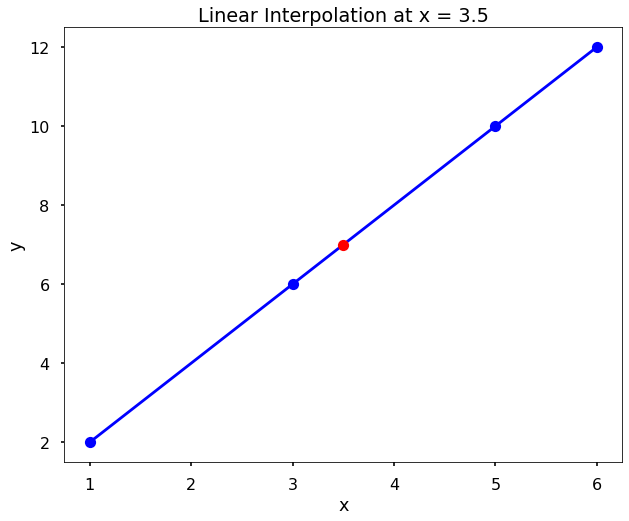

In [13]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

# set the values of x and y for the data set
x = [1,3,5,6]
y = [2,6,10,12]

# calculate the value of y by inputing a x value 
f = interp1d(x, y)
y_hat = f(3.5)

# print out the value of y when x=3.5
print(y_hat)

# plot the point (3.5, 7)
plt.figure(figsize = (10,8))
plt.plot(x, y, '-ob')
plt.plot(3.5, y_hat, 'ro')
plt.title('Linear Interpolation at x = 3.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

As the image showed above, by using linear interpolation function. It generates the value of 7 for y when x=3.5, and the point(3.5, 7) lies on the line that joining the its nearest point on the left(3,6) and right(5,10)

**Section 17.3: Cubic Spline Interpolation**

Cubic spline interpolation is a set of piecewise cubic functions with the assummption that the points(xi,yi) and (x(i+1),y(i+1)) are joined by a standard cubic polynomial function. Each standard cubic polynomial function has 4 coefficients. Therefore, for n points ,there are (n-1) standard cubic polynomial functions. Then there are 4(n-1) unknown coefficients and 4(n-1) independent equations are needed to find all the coefficients

First, since each cubic function intersect the data points that on the left and right, then there are 2(n-1) equations with a number of n points

Second, the first derivative and the second derivatives of each standard cubic polynomial function join the the first derivative and the second derivatives of its next standard cubic polynomial function at the data points. Wich gives 2(n-2) euqations.

constructing the last two equations that are required for computing the coefficients by setting the second derivatives equals to 0 at the endpints. 

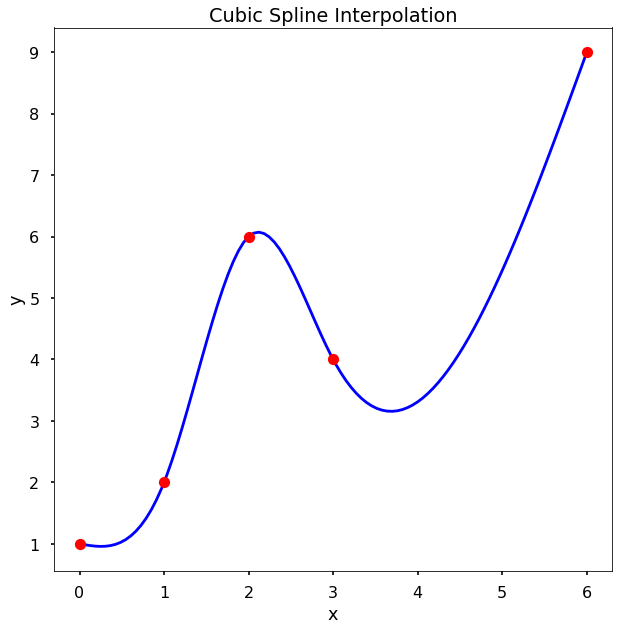

In [30]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')


# set up the values for each datapoints
x = [0,1,2,3,6]
y = [1,2,6,4,9]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_new = np.linspace(0, 6, 100)
y_new = f(x_new)

# ploting the graph
plt.figure(figsize = (10,10))
plt.plot(x_new, y_new, 'b')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()